In [2]:
from cmdstanpy import CmdStanModel
import cmdstanpy
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Excercise 1 -  Generated Quantities Block

Compiling and sampling.

In [22]:
gen_quant = CmdStanModel(stan_file='code_1.stan')
samples = gen_quant.sample(data={'M':5}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


Creating the dataframe and plotting the spectograms.

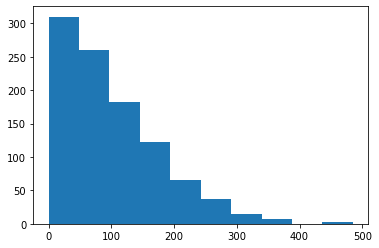

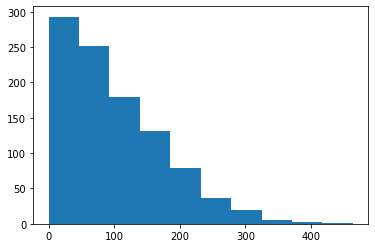

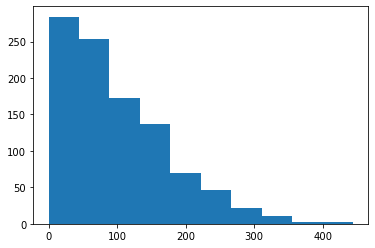

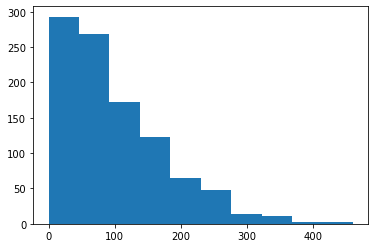

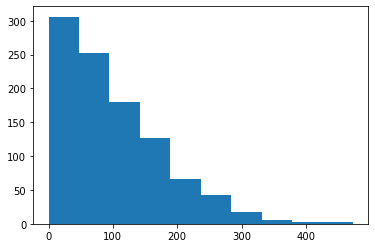

In [21]:
y_sim = pd.DataFrame(samples.stan_variable('y_sim'))
for col in y_sim.columns:
    plt.figure(col)
    plt.hist(y_sim[col])

## Excercise 2 - Constraints on the data 

In [ ]:
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,2]})

In [ ]:
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,2]})

## Excercise 3 - Constraints on parameters

### Unconstrained parameters

In [4]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()

INFO:cmdstanpy:compiling stan file C:\STUFF\8th_semester\public_lectures\Data Analytics 2022\Lab 2 - Intro to stan\code_4.stan to exe file C:\STUFF\8th_semester\public_lectures\Data Analytics 2022\Lab 2 - Intro to stan\code_4.exe
INFO:cmdstanpy:compiled model executable: C:\STUFF\8th_semester\public_lectures\Data Analytics 2022\Lab 2 - Intro to stan\code_4.exe
INFO:cmdstanpy:created output directory: C:\STUFF\8th_semester\public_lectures\Data Analytics 2022\Lab 2 - Intro to stan\samples
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |████      | 00:00 Iteration: 2600 / 7000 [ 37%]  (Sampling)


chain 1 |█████████ | 00:00 Iteration: 6200 / 7000 [ 88%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: C:\\STUFF\\8th_semester\\public_lectures\\Data Analytics 2022\\Lab 2 - Intro to stan\\samples\\code_4-20220618215742_1.csv, C:\\STUFF\\8th_semester\\public_lectures\\Data Analytics 2022\\Lab 2 - Intro to stan\\samples\\code_4-20220618215742_2.csv, C:\\STUFF\\8th_semester\\public_lectures\\Data Analytics 2022\\Lab 2 - Intro to stan\\samples\\code_4-20220618215742_3.csv, C:\\STUFF\\8th_semester\\public_lectures\\Data Analytics 2022\\Lab 2 - Intro to stan\\samples\\code_4-20220618215742_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n8638 of 24000 (35.99%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE

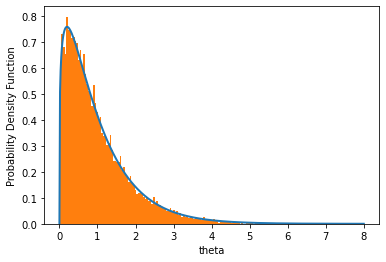

In [8]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples with 160 bins
theta = out_gamma1.stan_variable('theta')
axes = plt.hist(theta, bins=160, density=True)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()


### Constrained parameter

In [11]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:compiling stan file C:\STUFF\8th_semester\public_lectures\Data Analytics 2022\Lab 2 - Intro to stan\code_5.stan to exe file C:\STUFF\8th_semester\public_lectures\Data Analytics 2022\Lab 2 - Intro to stan\code_5.exe
INFO:cmdstanpy:compiled model executable: C:\STUFF\8th_semester\public_lectures\Data Analytics 2022\Lab 2 - Intro to stan\code_5.exe
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |████▍     | 00:00 Iteration: 2900 / 7000 [ 41%]  (Sampling)



chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: C:\\STUFF\\8th_semester\\public_lectures\\Data Analytics 2022\\Lab 2 - Intro to stan\\samples\\code_5-20220618220307_1.csv, C:\\STUFF\\8th_semester\\public_lectures\\Data Analytics 2022\\Lab 2 - Intro to stan\\samples\\code_5-20220618220307_2.csv, C:\\STUFF\\8th_semester\\public_lectures\\Data Analytics 2022\\Lab 2 - Intro to stan\\samples\\code_5-20220618220307_3.csv, C:\\STUFF\\8th_semester\\public_lectures\\Data Analytics 2022\\Lab 2 - Intro to stan\\samples\\code_5-20220618220307_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n1 of 24000 (0.00%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFM

In this diagnostic we can read that 0% of transisions ended with divergence unlike in in the code_4.stan

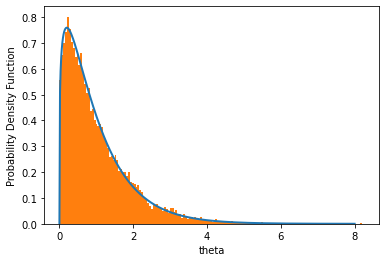

In [12]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples from the second model with 160 bins
theta = out_gamma2.stan_variable('theta')
axes = plt.hist(theta, bins=160, density=True)

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

## Excercise 4 -  Selection of parameters using equation solving



In [21]:
model_tune = CmdStanModel(stan_file='code_6.stan')

F = 5  # number of letters in the first name
L = 4  # number of letters in the last name
y0 = 1  # initial guess for the equation solving

data={'y_guess':[y0], 'theta':[(F+L)/2]}
tunes = model_tune.sample(
        data=data, 
        fixed_param=True, 
        iter_sampling=1, 
        iter_warmup=0, 
        chains = 1
        )

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [22]:
sigma = tunes.stan_variable('sigma')
print(sigma)

[1.74701]


## Excercise 5 - different methods of defining models


In [24]:
data = {'N': F}

In [25]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
result_1 = model_samp_st.sample(data=data)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [29]:
model_log_target = CmdStanModel(stan_file='code_8.stan')
result_2 = model_log_target.sample(data=data)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


In [30]:
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
result_3 = model_log_target_ind.sample(data=data)

INFO:cmdstanpy:compiling stan file C:\STUFF\8th_semester\public_lectures\Data Analytics 2022\Lab 2 - Intro to stan\code_9.stan to exe file C:\STUFF\8th_semester\public_lectures\Data Analytics 2022\Lab 2 - Intro to stan\code_9.exe
INFO:cmdstanpy:compiled model executable: C:\STUFF\8th_semester\public_lectures\Data Analytics 2022\Lab 2 - Intro to stan\code_9.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/STUFF/8TH_SE~1/PUBLIC~1/DATAAN~1/LAB2-I~1/code_9.hpp C:/STUFF/8TH_SE~1/PUBLIC~1/DATAAN~1/LAB2-I~1/code_9.stan
Warning in 'C:/STUFF/8TH_SE~1/PUBLIC~1/DATAAN~1/LAB2-I~1/code_9.stan', line 6, column 1: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -m64 -D_REENTRANT -Wall -Wno-unused-function -Wno-uninitialized -Wno-unuse


INFO:cmdstanpy:CmdStan done processing.


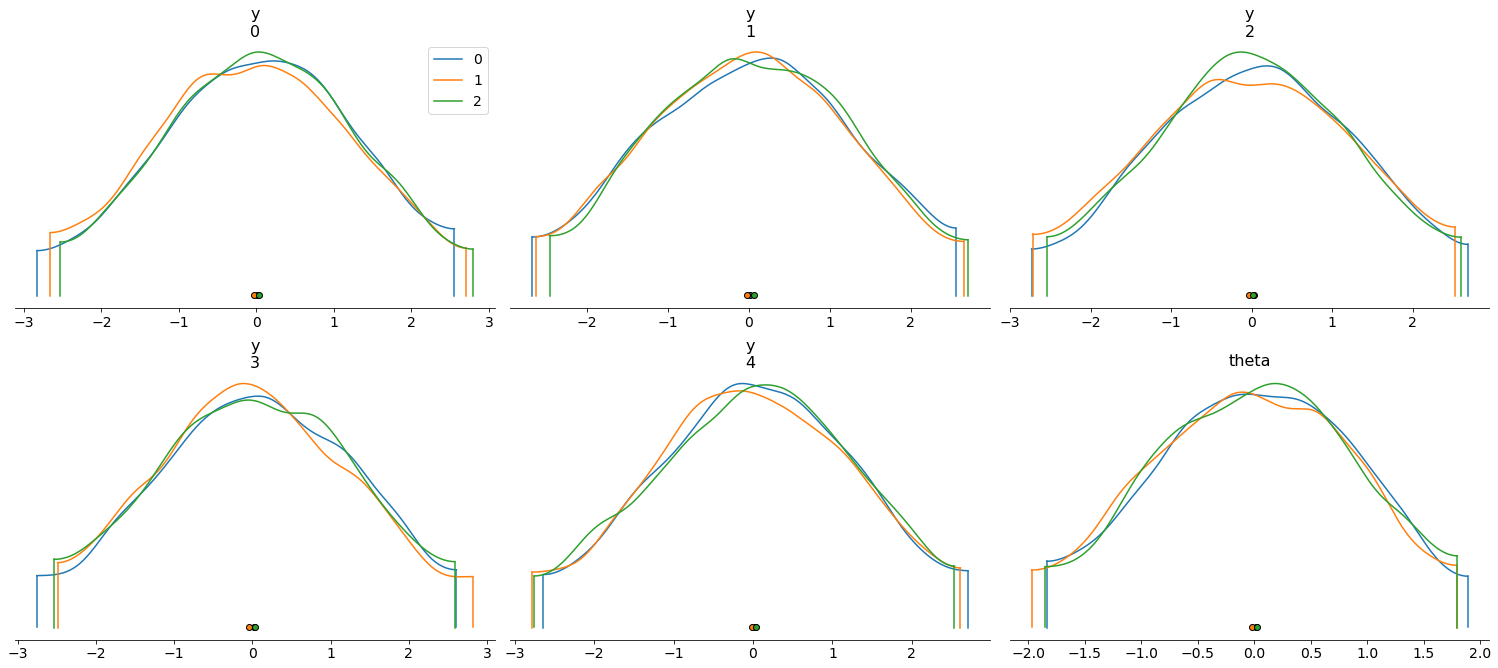

In [31]:
az.plot_density([result_1,result_2,result_3])
plt.show()

## Excercise 6 - generated quantities post sampling

In [33]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_3)

INFO:cmdstanpy:compiling stan file C:\STUFF\8th_semester\public_lectures\Data Analytics 2022\Lab 2 - Intro to stan\code_10.stan to exe file C:\STUFF\8th_semester\public_lectures\Data Analytics 2022\Lab 2 - Intro to stan\code_10.exe
INFO:cmdstanpy:compiled model executable: C:\STUFF\8th_semester\public_lectures\Data Analytics 2022\Lab 2 - Intro to stan\code_10.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/STUFF/8TH_SE~1/PUBLIC~1/DATAAN~1/LAB2-I~1/code_10.hpp C:/STUFF/8TH_SE~1/PUBLIC~1/DATAAN~1/LAB2-I~1/code_10.stan
Warning in 'C:/STUFF/8TH_SE~1/PUBLIC~1/DATAAN~1/LAB2-I~1/code_10.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -m64 -D_REENTRANT -Wall -Wno-unused-function -Wno-uninitialized -Wno

<AxesSubplot:ylabel='Frequency'>

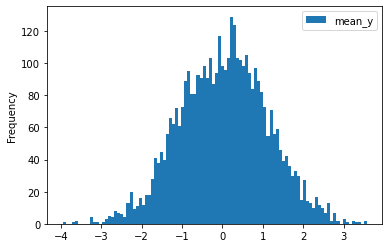

In [34]:
# investigate the output and plot histogram of mean_y variable
df = mean_of_y.draws_pd()
df.plot.hist(bins=100)